*@author Laura María Pedraza Gómez*

## Dataset Titanic

**Importación inicial**

In [33]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')

### Visualización de datos con Pandas

In [35]:
import pandas as pd

# Almacenamiento de la ruta del dataset en una variable
rutaDataset = "Titanic-Dataset.csv"

# Lectura del dataset
df = pd.read_csv(rutaDataset)

# Visualización de los datos 5 primeros datos del Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Indentificación de características de entrada y salida

In [37]:
# Selección de caracteríticas de entrada 
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()  
# Selección de caracteristicas de salida
y = df['Survived'].copy()

# Visualización de las características de salida y entrada para los 5 primeros datos
print("Características de entrada:")
print(X.head())

print("\nCaracterística de salida:")
print(y.head())

Características de entrada:
   Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500

Característica de salida:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [38]:
# Visualización de las características
pd.DataFrame(X.head())

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [39]:
# Visualización de la salida
pd.DataFrame(y.head())

,Survived
0,0
1,1
2,1
3,1
4,0


### Preparacion de los datos

In [41]:
# Mostrar cuántos valores nulos hay en cada columna
print("Valores nulos antes del tratamiento: \n", X.isnull().sum())

Valores nulos antes del tratamiento: 
 Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


In [42]:
# Reemplazo de valores faltantes en 'Age'
if 'Age' in X.columns:
    X['Age'] = X['Age'].fillna(X['Age'].mean())

In [43]:
# Comprobar nuevamente los nulos
print("Valores nulos después del tratamiento: \n", X.isnull().sum())

Valores nulos después del tratamiento: 
 Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


### Dividir en conjunto de entrenamiento y prueba

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train

,Pclass,Age,SibSp,Parch,Fare
331,1,45.500000,0,0,28.5000
733,2,23.000000,0,0,13.0000
382,3,32.000000,0,0,7.9250
704,3,26.000000,1,0,7.8542
813,3,6.000000,4,2,31.2750
...,...,...,...,...,...
106,3,21.000000,0,0,7.6500
270,1,29.699118,0,0,31.0000
860,3,41.000000,2,0,14.1083
435,1,14.000000,1,2,120.0000


In [47]:
X_test

,Pclass,Age,SibSp,Parch,Fare
709,3,29.699118,1,1,15.2458
439,2,31.000000,0,0,10.5000
840,3,20.000000,0,0,7.9250
720,2,6.000000,0,1,33.0000
39,3,14.000000,1,0,11.2417
...,...,...,...,...,...
433,3,17.000000,0,0,7.1250
773,3,29.699118,0,0,7.2250
25,3,38.000000,1,5,31.3875
84,2,17.000000,0,0,10.5000


In [48]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [49]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### Entrenar el modelo Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Evaluar el modelo

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7094972067039106
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77       105
           1       0.70      0.53      0.60        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179

Confusion Matrix:
 [[88 17]
 [35 39]]


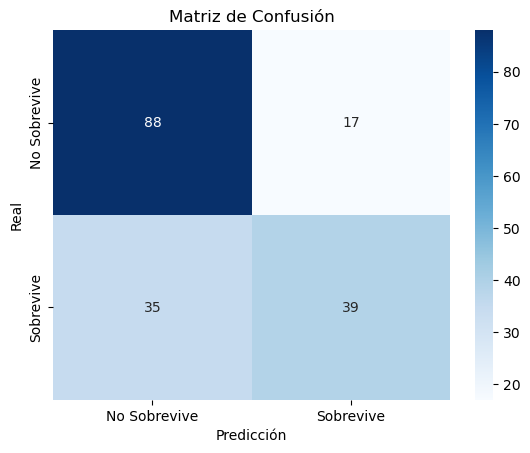

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       105
           1       0.70      0.53      0.60        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179



In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

### Visualización

In [56]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec

def plot_decision_boundary(X_reducido, y, clf, pca):
    mins = X_reducido.min(axis=0) - 0.5
    maxs = X_reducido.max(axis=0) + 0.5  

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 71),
                         np.linspace(mins[1], maxs[1], 81))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_original = pca.inverse_transform(mesh_points)

    Z = clf.predict_proba(mesh_points_original)[:, 1]
    Z = Z.reshape(xx.shape)

    gs = gridspec.GridSpec(1, 2)
    gs.update(hspace=0.8)

    ax = plt.subplot(gs[0])
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    ax.plot(X_reducido[y==1, 0], X_reducido[y==1, 1], 'r.')
    ax.plot(X_reducido[y==0, 0], X_reducido[y==0, 1], 'b.')

    ax = plt.subplot(gs[1])
    ax.contour(xx, yy, Z, [0.5], colors='k')
    ax.plot(X_reducido[y==1, 0], X_reducido[y==1, 1], 'r.')
    ax.plot(X_reducido[y==0, 0], X_reducido[y==0, 1], 'b.')

In [57]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_reducido = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

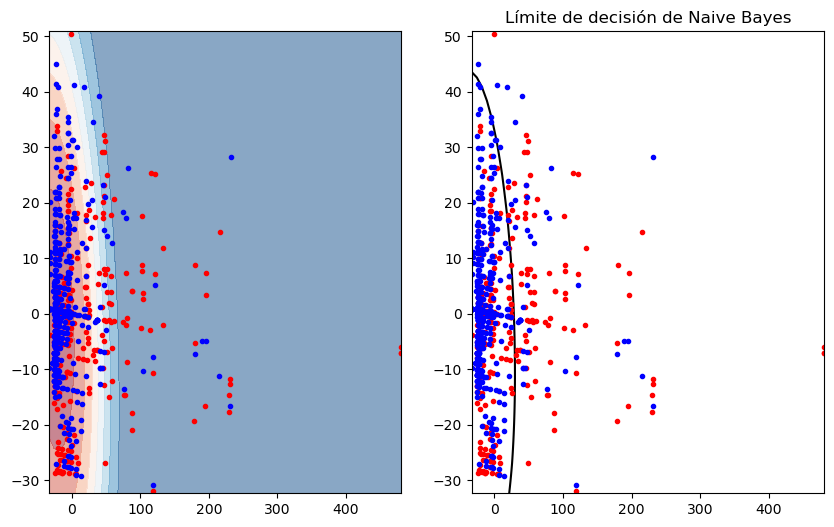

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Límite de decisión de Naive Bayes
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_reducido.values, y.values, model, pca)
plt.title("Límite de decisión de Naive Bayes")
plt.show()

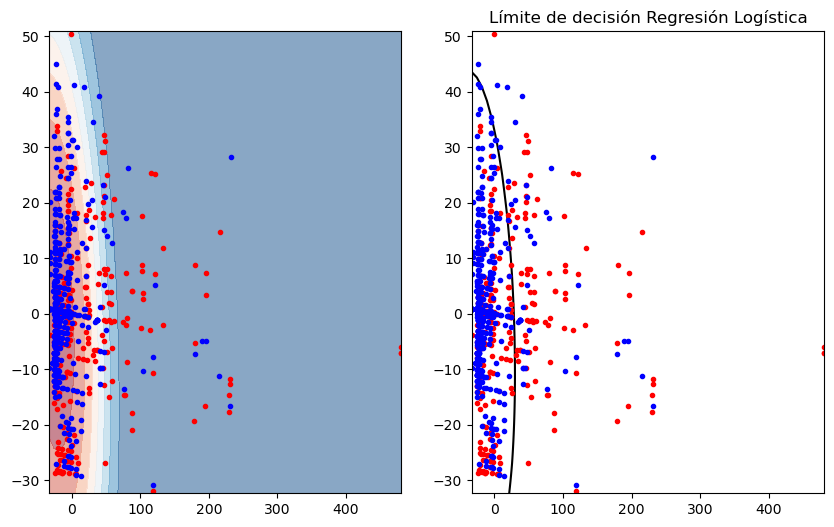

In [59]:
# Límite de decisión Regresión Logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_decision_boundary(X_reducido.values, y.values, model, pca)
plt.title("Límite de decisión Regresión Logística")
plt.show()